## 필요 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
%matplotlib inline
matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)
import warnings
warnings.filterwarnings('ignore')

# 작업 디렉터리를 설정
import os
os.chdir('/home/piai/실습파일/BigData분석')

# 주성분 분석(PCA)

## 1. 데이터 구성하기

In [2]:
df = pd.read_csv("IRIS.csv", encoding='euc-kr')

In [3]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_x = df.drop(columns='SPECIES')
df_y = df['SPECIES']

### - 결측치 확인 
없음

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float64
 1   SEPAL_WIDTH   150 non-null    float64
 2   PETAL_LENGTH  150 non-null    float64
 3   PETAL_WIDTH   150 non-null    float64
 4   SPECIES       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. 선형관계 확인

### 2.1 산점도 및 상관계수

- SEPAL LENGTH는 PETAL LENGTH(0.872), PETAL WIDTH(0.818)와 강한 양의 상관관계(선형성)를 갖는다.
- PETAL LENGTH는 PETAL WIDTH(0.963)와 강한 양의 상관관계(선형성)를 갖는다.

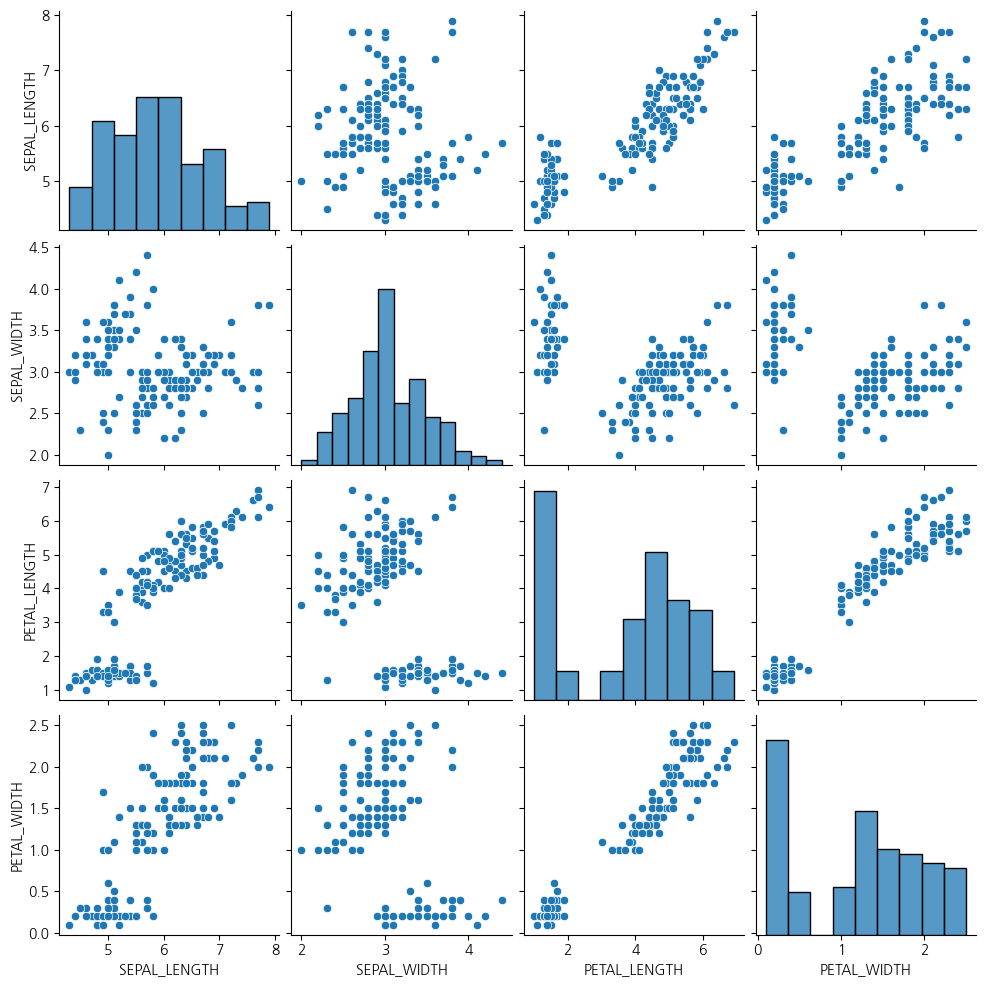

In [6]:
sns.pairplot(df)

In [7]:
df.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


<Axes: >

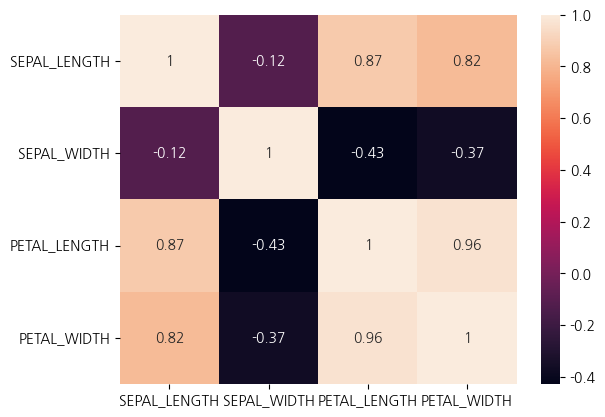

In [8]:
sns.heatmap(df.corr(), annot=True)

## 3. 데이터 확인 및 Scaling

### 3.1 데이터 확인
- X 변수간의 scale에 차이가 존재하는 것을 확인할 수 있다.

In [9]:
df_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 3.2 Scaling ( by StandardScaler )
- StandardScaler를 이용하여 각 X 변수들을 표준화시켰다.
- 표준화된 X변수는 기술통계량의 요약으로 확인할 수 있으며, 평균이 0, 분산이 약 1의 값을 가짐으로 표준화가 잘 이루어졌음을 알 수 있다.ㅡ

In [10]:
scaler =StandardScaler()
df_x_scaled = pd.DataFrame(scaler.fit_transform(df_x), columns = df_x.columns)
df_x_scaled.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
df_x_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


## 4. 주성분 분석 및 결과

### 4.1 주성분 분석
- 기존의 X변수들은 4개로 이루어져 있다. 따라서 주성분의 수는 최대 4개까지 생성 가능하며, 각 주성분(PC)들은 X변수들인 SEPAL_LENGTH, SEPAL_WIDTH, PETAL_LENGTH, PETAL_WIDTH로 이루어진 축으로 이해가 가능하다.  
- 아래의 결과는 X의 데이터를 각 PC에 투영시켜 변환된 X변수들이며, 변환된 데이터셋의 형태는 (150, 4)으로 기존의 X변수의 데이터셋 형태와 같다.

In [12]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_x_scaled)
print("PCA Data {}: \n".format(nd_pca[0:5]))
print("Shape {}: \n".format(nd_pca.shape))

PCA Data [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]: 

Shape (150, 4): 



- 기존의 표준화된 X변수 데이터들과 주성분 점수(PC축으로 투영된 X변수 데이터)들의 결합

In [13]:
df_pca = pd.DataFrame(nd_pca, columns = ["PC1","PC2","PC3","PC4"])
df_scaled_pca = df_x_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,PC1,PC2,PC3,PC4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


### 4.2 주성분 결과 ( Eigenvalue 확인 및 주성분 개수 결정 )
- 다음은 Eigenvalue를 확인하고, 주성분의 데이터에 대한 설명력(분산)을 나타내는 기여도 및 누적 기여도를 확인하였다.
- 주성분1, 주성분2를 선택하였을 때, 데이터에 대한 누적 기여도가 0.958로 충분히 높은 설명력을 가지고 있다고 판단된다. 따라서 4개의 주성분 중 주성분1, 주성분2 총 2개의 주성분을 선택하였다.

In [14]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1,5)]
df_pca_stat["EigenValues"] = pca.explained_variance_ 
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_ 
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


- Scree plot을 통해, PC2에서 고유값이 급격하게 감소하는 것을 확인할 수 있다.(elbow point)

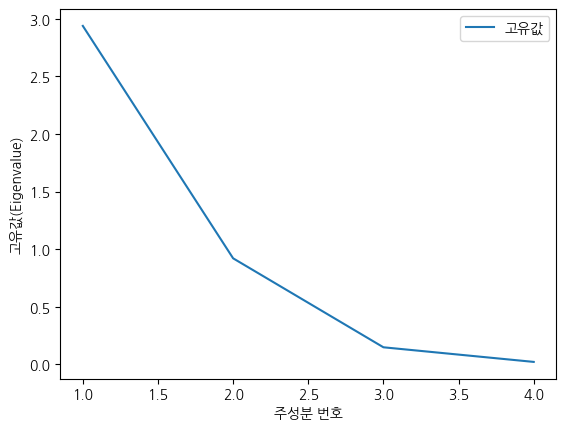

In [15]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], 
         label="고유값")
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

- 선택된 주성분은 다음과 같다.

##### - PC1 = -0.521 * SEPAL_LENGTH + 0.269 * SEPAL_WIDTH - 0.580 * PETAL_LENGTH - 0.565 * PETAL_WIDTH
##### - PC2 = -0.377 * SEPAL_LENGTH - 0.923 * SEPAL_WIDTH - 0.024 * PETAL_LENGTH - 0.067 * PETAL_WIDTH

In [16]:
x_cols = pd.DataFrame({"Feature":df_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_[0:2,].T , \
                            columns = ["PC1","PC2"])], axis=1)
df_eigenvector.round(3)

,Feature,PC1,PC2
0,SEPAL_LENGTH,0.521,0.377
1,SEPAL_WIDTH,-0.269,0.923
2,PETAL_LENGTH,0.580,0.024
3,PETAL_WIDTH,0.565,0.067


## 5. 주성분 상관분석

- 주성분은 서로 독립이기 때문에, 주성분이 잘 생성되었다면 주성분 간의 상관관계는 존재하지 않아야 한다.  
- 아래의 상관행렬을 통해, 대각성분을 제외하고 나머지 상관계수들이 0값을 보이고 있기 때문에 주성분이 잘 생성되었음을 알 수 있다.

In [17]:
df_pca.corr().round(3)

,PC1,PC2,PC3,PC4
PC1,1.0,0.0,0.0,-0.0
PC2,0.0,1.0,-0.0,-0.0
PC3,0.0,-0.0,1.0,-0.0
PC4,-0.0,-0.0,-0.0,1.0


## 6. 주성분 결과 탐색 : 품종별 입력 / 주성분 변수 분포 ( 산점도 )

- 다음은 주성분 점수와 목표변수인 SPECIES를 병합한 데이터프레임이다. 아래의 데이터 프레임을 이용하여 품종(SPECIES 변수)에 따른 주성분 변수의 분포를 알아보고자 한다.

In [18]:
df_merge = pd.concat([df_pca, df_y], axis=1)
df_merge

,PC1,PC2,PC3,PC4,SPECIES
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


##### - 결과 해석

- PC1과 PC2만으로도 누적 0.958의 전체 데이터에 대한 높은 설명력을 가지기 때문에, PC1, PC2를 축으로 하는 차원에서 품종(SPECIES)에 따른 주성분 변수의 분포를 확인하였다. PC1과 PC2는 다음과 같다.
1) PC1 = -0.521 * SEPAL_LENGTH + 0.269 * SEPAL_WIDTH - 0.580 * PETAL_LENGTH - 0.565 * PETAL_WIDTH
2) PC2 = -0.377 * SEPAL_LENGTH - 0.923 * SEPAL_WIDTH - 0.024 * PETAL_LENGTH - 0.067 * PETAL_WIDTH

- 이를 통해 PC1은 SEPAL_LENGTH, PETAL_LENGTH, PETAL_WIDTH가 주로 영향을 미치는 주성분이며, 세 변수가 음의 계수를 가지므로, 세 변수의 값이 작을수록 큰 PC1의 값을 가지게 된다.
- 또한 PC2는 SEPAL_WIDTH가 대부분의 영향을 미치는 주성분이며, SEPAL_WIDTH가 음의 계수를 가지므로 SEPAL_WIDTH의 값이 작을수록 큰 PC2의 값을 가지게 된다.

- 아래의 산점도를 확인하면, 품종에 따른 주성분 점수들이 PC1축에 대하여 잘 구분되어짐을 확인할 수 있다. PC1축을 기준으로 setosa는 -2부터 -3 범위 사이에, versicolor는 주로 0부터 1사이의 범위에서 나타나는 것으로 확인되며, 마지막으로 virginica는 1에서 3사이의 범위에서 나타난 것을 볼 수 있다.  

- 또한 PC2축에 대한 주성분 점수들을 살펴볼 수 있다. PC2축을 기준으로 setosa는 -3부터 1 범위 사이에, versicolor는 주로 -2부터 1사이의 범위에서 나타나는 것으로 확인되며, 마지막으로 virginica는 -1에서 2사이의 범위에서 나타난 것을 볼 수 있다. PC2는 품종에 따른 개체들(데이터)를 잘 구분하지 못하는 것으로 확인되었는데, 이것은 주성분 분석 결과로 확인한 Eigenvalue의 크기에 따라 PC1이 데이터에 대한 대부분의 설명력을 갖는다는 사실로 설명될 수 있다. 

- 결론적으로 PC1에 대하여 범위가 setosa < versicolor < virginica로 나타난 것을 확인할 수 있었고, PC1은 3가지 변수와 음의 상관성을 가짐에 따라, SEPAL_LENGTH, PETAL_LENGTH, PETAL_WIDTH의 크기가 virginica < versicolor < setosa 순임을 알 수 있었다.  
또한 PC2에 대하여, SEPAL_WIDTH이 대부분의 영향력을 미친다는 점을 통해 세 3품종의 개체들이 명확하게 구분되지 않는 SEPAL_WIDTH를 가진다는 사실을 알 수 있었다.

<Axes: xlabel='PC1', ylabel='PC2'>

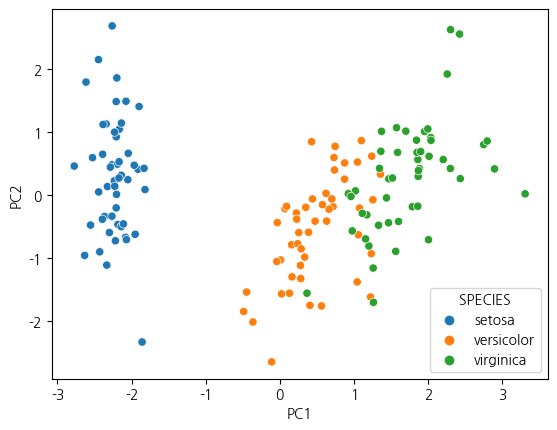

In [19]:
sns.scatterplot(df_merge, x='PC1', y='PC2', hue='SPECIES')

# 시계열 분석(Time Series)

## 1. 데이터 구성하기

In [20]:
df_raw = pd.read_csv("환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


##### - USD 데이터 분할

In [48]:
df_USD = df_raw[df_raw["CURRENCY"] == "USD"]
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_USD.head()

,APPL_DATE,STD_RATE
2,2016-01-01,1178.0
5,2016-01-02,1178.0
8,2016-01-03,1178.0
11,2016-01-04,1184.0
14,2016-01-05,1185.0


## 2. 변동 추세 확인

- Jan 4일부터 20일까지, Feb 20일부터 Mar 3일까지의 구간, Mar 17일부터 31일까지 구간에서 평균과 변동이 서로 달라 정상성이 만족되지 않아보인다.

<Axes: xlabel='APPL_DATE'>

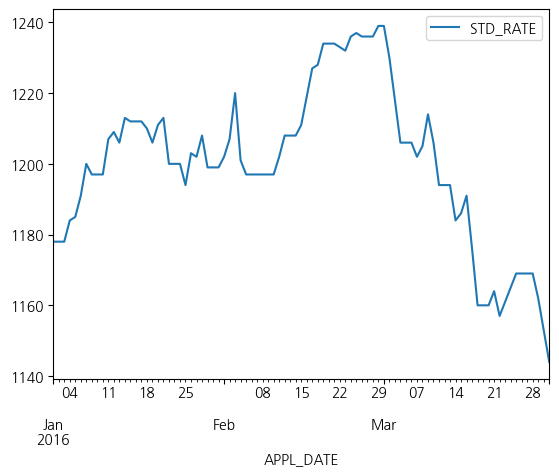

In [54]:
df_USD.plot("APPL_DATE", "STD_RATE")

## 3. 시계열 분석 : 데이터 분할 - training / test 데이터 분할

### 3.1 9대 1의 비율로 training - test 데이터 분할

In [23]:
train_size = 0.9
len_idx = len(df_USD.index)

mask = (np.arange(len_idx) / len_idx) < train_size 
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [24]:
df_USD_train = df_USD[mask]
df_USD_test = df_USD[~mask]
print("shape of train data: {}".format(df_USD_train.shape))
print("shape of test data: {}".format(df_USD_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


### 3.2 차분을 통한 정상성 데이터로의 변환

### 3.1 ADF 검정

주어진 ADF 검정 결과를 해석하면 다음과 같다.:

1. **ADF 검정 통계량 (ADF Statistic)**: -0.685286750211321
   - ADF 검정 통계량은 -0.685로, 이 값은 잔차 시계열 데이터가 단위근(unit root) 프로세스인지를 확인하는 데 사용된다.  ADF 검정 통계량이 음수인 경우, 단위근이 없음을 의미한다.

2. **P-value**: 0.850523881305663
   - P-value는 0.8505로, 이 값은 귀무가설이 "단위근이 존재한다"는 가정하에 해당하는 확률이다. 일반적으로 유의수준 0.05보다 크면 귀무가설을 기각할 수 없으며, 시계열 데이터가 정상성을 만족한다고 할 수 없다.

해석 결과, P-value가 0.85로 매우 크므로 귀무가설을 기각할 수 없다. 따라서 시계열 데이터가 정상성을 만족하지 않으며, 시계열 데이터에 단위근이 존재한다고 결론지을 수 있다.

In [57]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_USD_train)

print('ADF 검정 통계량 (ADF Statistic):', result[0])
print('P-value:', result[1])
print('사용된 래그(Used Lag):', result[2])
print('관찰된 데이터 개수 (Number of Observations Used):', result[3])
print('임계값(Critical Values):')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF 검정 통계량 (ADF Statistic): -0.685286750211321
P-value: 0.850523881305663
사용된 래그(Used Lag): 0
관찰된 데이터 개수 (Number of Observations Used): 81
임계값(Critical Values):
	1%: -3.5137900174243235
	5%: -2.8979433868293945
	10%: -2.5861907285474777


### 3.2 데이터 차분

- 2차 차분을 통해 비교적 정상성을 만족할 것으로 생각되는 데이터로 변경하였다.

<Axes: xlabel='APPL_DATE'>

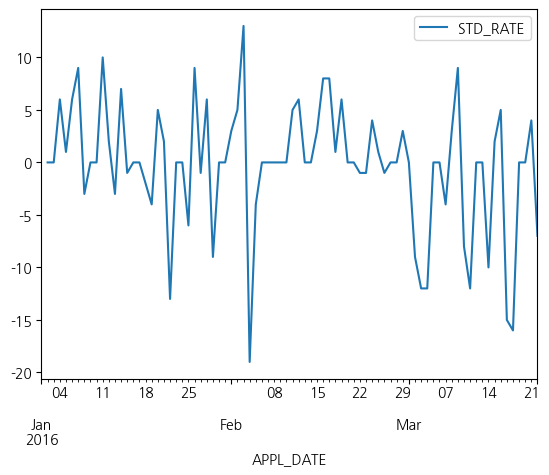

In [26]:
df_USD_diff1 = df_USD_train - df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

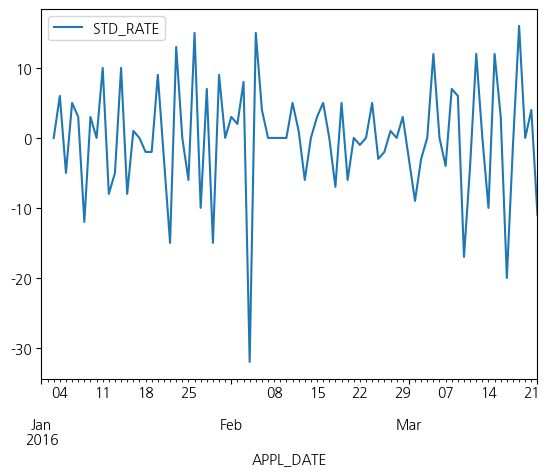

In [27]:
df_USD_diff2 = df_USD_train - 2 * (df_USD_train.shift(1)) + (df_USD_train.shift(2))
df_USD_diff2.plot()

### 3.3 자기상관 함수 및 부분 자기 상관 함수
- ACF는 지속적으로 감소하고 p = 12 시점에서 양에서 음으로 변하고, PACF는 p=1 시점에서 0.9보다 크고 이후 급격히 감소함  
따라서 p=1, q=0 모델이 적당하다고 판단하였다.

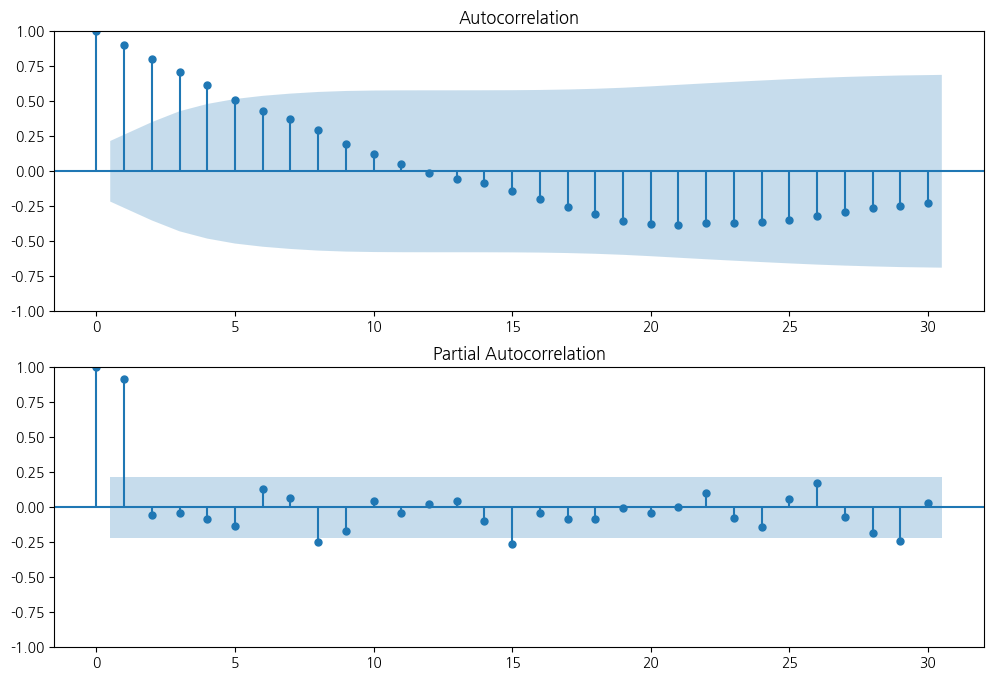

In [28]:
lag_size = 30
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax1)
ax2 = fig.add_subplot(212) 
fig = plot_pacf(df_USD_train["STD_RATE"], lags=lag_size, ax=ax2)

### 3.4 시계열 모델
- ar.L1 (자기 회귀(AR) 1차)는 -0.3764로 추정는었다. 이는 단계의 관측치가 현재 시간 단계의 값에 어떤 영향을 미치는지를 나타낸다. 여기서는 음수이므로 이전 값이 현재 값에 부정적인 영향을 미친다는 것을 나타내고 있음을 알 수 있다.
- sigma2는 잔차 분산으로 56.2767의 값을 가지며, 모델이 데이터의 변동을 얼마나 잘 설명한지 나타낸다.
- 또한 해당 가설은해당 계수가 0이 아닌지에 대한 가설을 검정하므로, P-value가 유의수준(보통 0.05)보다 작아 해당 계수가 통계적으로 유의미하다고 할 수 있다.


In [55]:
ts_model_USD = ARIMA(df_USD_train, order = (1, 2, 0))  # (p,d,q) 지정

# 데이터 적합
ts_result_USD = ts_model_USD.fit()
print(ts_result_USD.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Wed, 06 Mar 2024   AIC                            553.608
Time:                        23:48:32   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

## 4. 예측 및 결과 해석

-2016년 3월 23일 ~ 31일까지의 예측값이 지속적으로 감소할 것으로 예측했다.

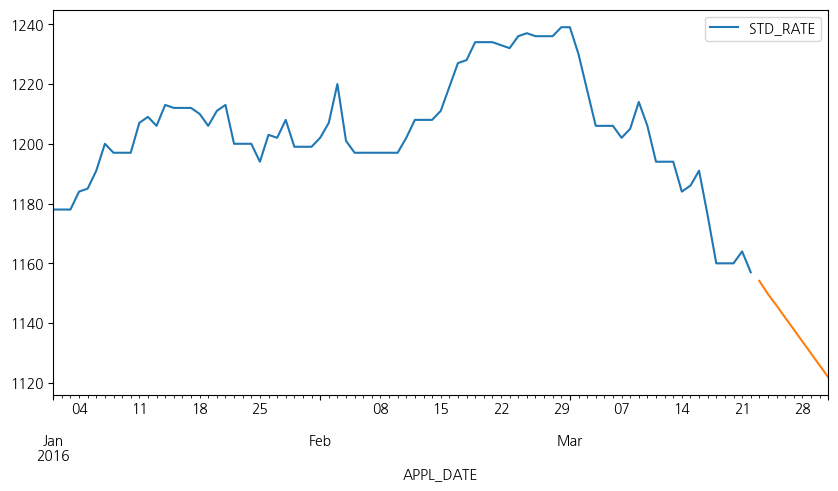

In [31]:
start_time = df_USD_test.index.min() 
end_time = df_USD_test.index.max()
fig, ax = plt.subplots(figsize = (10, 5))


ax = df_USD_train.plot(ax = ax)
fig = ts_result_USD.predict(start=start_time, end=end_time, ax = ax, plot_insample=False).plot()

- 모델 훈련구간은 실제값 대비 지연 현상이 확인되며 예측 구간은 오차가 크다.

In [33]:
start_time = pd.to_datetime("2016-01-03") 
y_pred = ts_result_USD.predict(start=start_time, end=end_time, typ= 'levels')
df_merge = df_USD
df_merge["예측값"]=y_pred  
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.029066
2016-01-04,1184.0,1178.000000
2016-01-05,1185.0,1187.741796


<Axes: xlabel='APPL_DATE'>

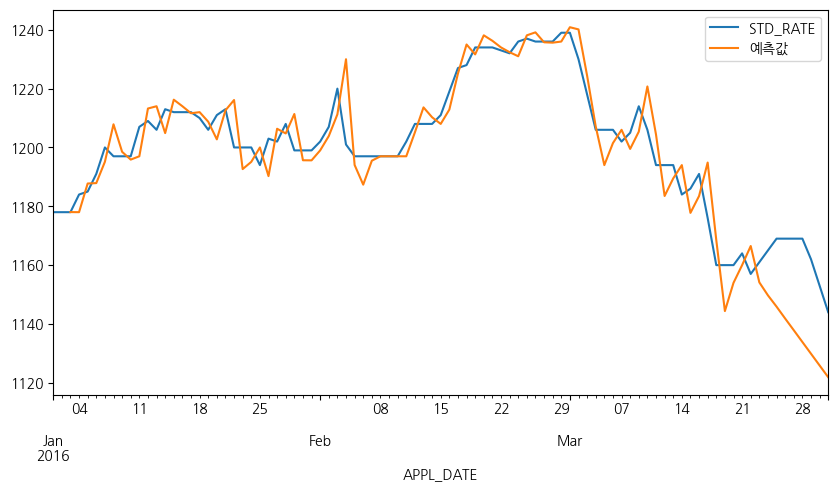

In [34]:
df_merge.plot( y=["STD_RATE","예측값"], figsize=(10,5))